# **Mini Project: Supervised Machine Learning**

## **Brief**

Select a dataset of your choice and create a supervised machine learning algorithm to provide
further insight into the data.

### **Requirements**

Description in general with detailed list of requirements.

1. Start with some exploration of the data – what are the fields, how are they distributed,
will they require any transformations?

2. Prepare the dataset for machine learning
   
3. Create an supervised machine learning model
   
4. Measure the accuracy of your model
   
### **Deliverables**

You should submit your code along with some analysis. Your analysis can be presented as
presentation slides, or using something like Jupyter Notebooks.

### **Data**

There are three datasets for you to choose from. Pick the one you find most interesting or have
an idea for how machine learning could be applied. I have given you some examples of the kind
of analysis you could do – but feel free to come up with your own!

**Dataset 1** – Fraud Detection
This is a dataset of bank transactions which have been classified as fraudulent or not.
Example insight: Can you create a machine learning model to accurately predict whether a
transaction is fraudulent or not?
File name: fraud_detection.csv
Find out more about this dataset here: https://www.kaggle.com/ntnu-testimon/paysim1

**Dataset 2** – Poisonous Mushrooms
This dataset contains information on a number of mushrooms, as well as a label indicating if
they are poisonous or not.
Example insight: Can you use the mushrooms characteristics to determine if the mushroom is
poisonous or not?
File name: mushrooms.csv
Find out more about this dataset here: https://www.kaggle.com/uciml/mushroom-classification

**Dataset 3** – Fake News
This dataset contains information on a number of social media posts and classifies them as real
or fake news.
Example insight: Can you build a machine learning model to detect which posts are likely to be
fake news?
File name: news_articles.csv
Find out more about this dataset here:
https://www.kaggle.com/ruchi798/source-based-news-classification

#### **Extension**
To extend the project, try using two different supervised learning algorithms and use methods to
measure their accuracy. Which model would you choose? Why?

# I have decided to work with the mushroom dataset.

# 1. Setting up

In [26]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


## 2. Data Exploration

### 2.1. Loading the data

In [3]:
# load dataset
df_original = pd.read_csv("mushrooms.csv")

In [4]:
df_original.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 2.2 Display structure and basic info

In [6]:
# column names
df_original.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [7]:
# check for missing values
df_original.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# check unique values per column
df_original.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### 2.3 Check class distribution

In [9]:
# class distribution
df_original['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

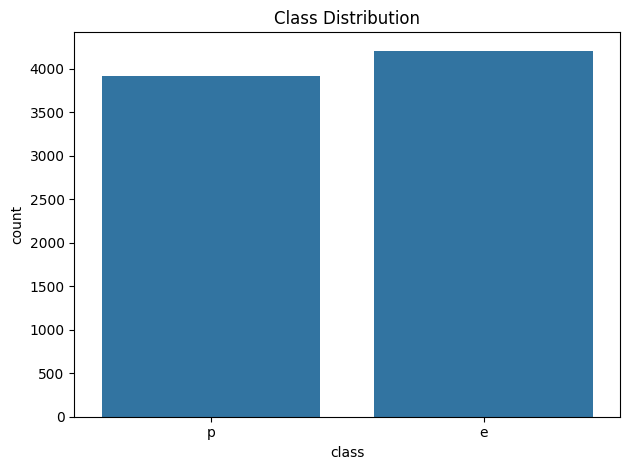

In [10]:
# visualise class distribution
sns.countplot(data=df_original, x='class')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

Distribtion is fairly balanced. Going to procede without class balancing.

### 2.4. Visualise feature distributions

To understand how categorical features are distributed, five were selected manually:

- cap-shape
- cap-surface
- cap-color
- odor
- gill-size

These were chosen to provide a mix of features describing physical appearance and biological traits. They also vary in complexity and number of unique values.

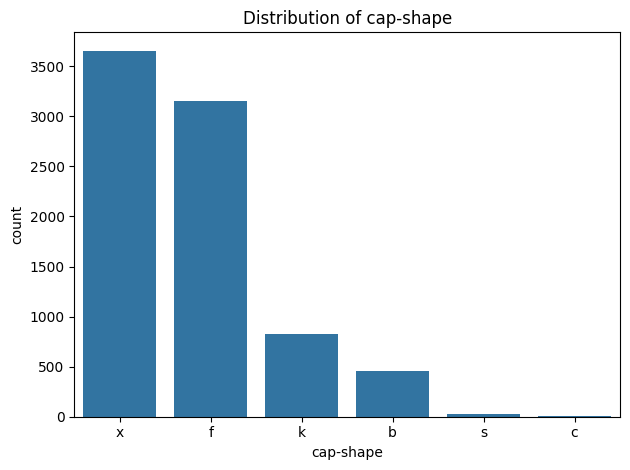

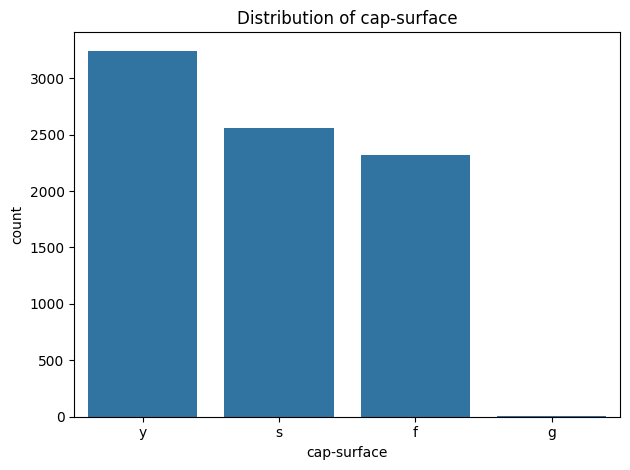

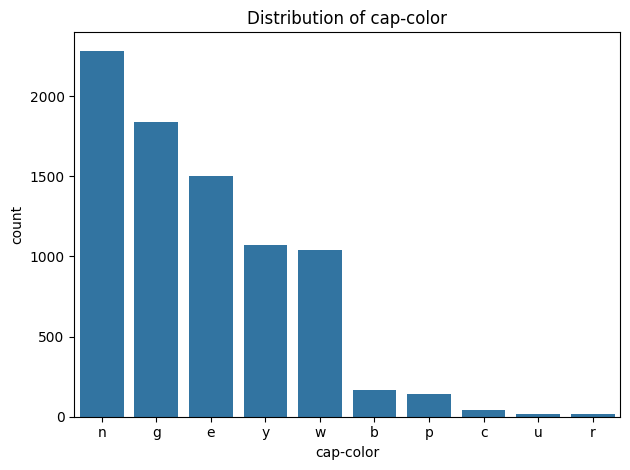

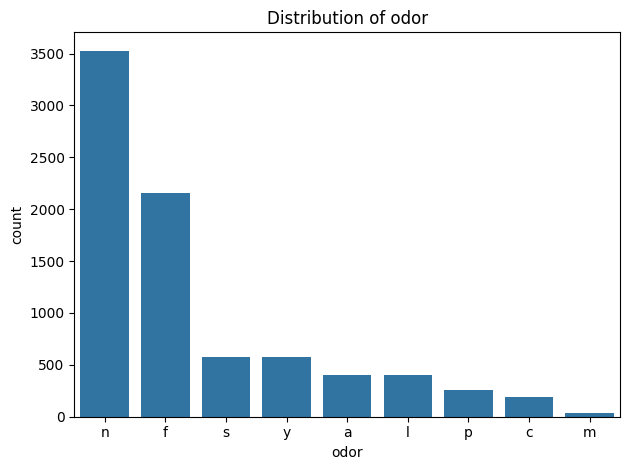

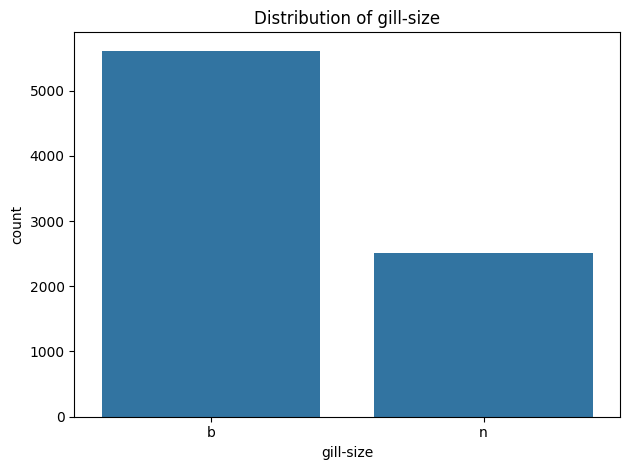

In [11]:
# select key features for distribution plots
features_to_plot = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-size']

# create countplots
for feature in features_to_plot:
    sns.countplot(data=df_original, x=feature, order=df_original[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

### 2.5 Identify data issues

- All features are categorical (object dtype)
- No missing values detected
- Some classes have dominant categories (e.g. gill-size 'b', odor 'n')
- 'veil-type' has only one unique value and will be dropped
- All features may need encoding before modelling

## 3 Data Preparation

### 3.1 Copy dataset

Creating copy of df_original named df_pre_clean to begin preprocessing, ensuring the original remains unchanged.

In [14]:
# copy original dataset
df_pre_clean = df_original.copy()

### 3.2 Handle missing values

- 'veil-type' has only one unique value and will be dropped
- 'stalk-root' contains missing values marked as '?', which will be replaced with NaN and imputed with the mode

In [15]:
# drop 'veil-type' as it provides no useful information
df_clean = df_pre_clean.drop(columns=['veil-type'])

# replace '?' in 'stalk-root' with np.nan
df_clean['stalk-root'] = df_clean['stalk-root'].replace('?', np.nan)

# impute missing values in 'stalk-root' with the mode
mode_stalk_root = df_clean['stalk-root'].mode()[0]
df_clean['stalk-root'] = df_clean['stalk-root'].fillna(mode_stalk_root)

In [16]:
df_clean.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 3.3 Encode categorical variables

In [19]:
# copy df
df_encoded = df_clean.copy()

# apply label encoding to all columns
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

### 3.4 Feature scaling

Scaling for logistic regression

In [20]:
# copy df
df_scaled = df_encoded.copy()

# separate features and target
X = df_scaled.drop(columns=['class'])
y = df_scaled['class']

# apply standard scaling to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Modelling

### 4.1 Split dataset




Splitting the dataset into training and test sets using 80:20 ratio.

In [21]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### 4.2 Choosen ML models


Going to use Logistic Regression and Decision Tree Classifier to compare performance between a linear and a tree-based model.

In [22]:
# initialise models
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=42)

### 4.3 Training models

In [23]:
# train logistic regression
model_lr.fit(X_train, y_train)

# train decision tree
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.4 Predict on test data

In [24]:
# predict with logistic regression
y_pred_lr = model_lr.predict(X_test)

# predict with decision tree
y_pred_dt = model_dt.predict(X_test)

## 5. Evaluation

### 5.1 Measuring accuracy and metrics

In [25]:
# evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f'{name} Results:')
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('Classification Report:\n', classification_report(y_true, y_pred))
    print('-' * 50)

# evaluate logistic regression
evaluate_model("Logistic Regression", y_test, y_pred_lr)

# evaluate decision tree
evaluate_model("Decision Tree", y_test, y_pred_dt)

Logistic Regression Results:
Accuracy: 0.9698461538461538
Confusion Matrix:
 [[815  27]
 [ 22 761]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       842
           1       0.97      0.97      0.97       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

--------------------------------------------------
Decision Tree Results:
Accuracy: 1.0
Confusion Matrix:
 [[842   0]
 [  0 783]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------


Both models perform very well, with Decision Tree achieving 100% accuracy and Logistic Regression at ~97%.

### 5.2 Compare models

- Decision Tree achieved perfect classification with 100% accuracy.
  
- Logistic Regression performed very well with ~97% accuracy.
  
- Decision Tree may be overfitting due to its perfect score on test data.
  
- Logistic Regression shows robust generalisation but slightly lower performance.

### 5.3 Justification for chosen model

DT had perfect accuracy, but could indicate overfitting. LR was slightly less accurate but is simpler and generalises better due to lower model complexity. I will choose DT for this dataset because of it's perfect performance.

## 6. [Extension] Hyperparameter tuning

6.1 Gridsearch

In [27]:
# define a small parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Original tree was already optimally configured for this dataset, as the parameters match the defaults.

### 6.2 Visualise performance

In [28]:
# predict with tuned decision tree
y_pred_best = best_model.predict(X_test)

# evaluate tuned model
evaluate_model("Tuned Decision Tree", y_test, y_pred_best)

Tuned Decision Tree Results:
Accuracy: 1.0
Confusion Matrix:
 [[842   0]
 [  0 783]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------


The tuned DT had perfect accuracy all round which confirms it's well suited for this dataset.

## 7. Findings

### 7.1 Summary and conclusion

- Dataset: Poisonous Mushrooms (8124 rows, 22 features, all categorical)
  
- Goal: Classify mushrooms as edible or poisonous
  
- Models used: Logistic Regression and Decision Tree
  
- Logistic Regression: 96.98% accuracy
  
- Decision Tree: 100% accuracy (even after tuning)
  
- **Conclusion**: Decision Tree is highly effective for this dataset. Logistic Regression generalises well but slightly underperforms.